In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # para leer datos
import sklearn.ensemble # para el random forest
import sklearn.model_selection # para split train-test
import sklearn.metrics # para calcular el f1-score
%matplotlib inline

In [2]:
# Carga datos
data = pd.read_csv('OJ.csv')

# Remueve datos que no se van a utilizar
data = data.drop(['Store7', 'PctDiscCH','PctDiscMM'],axis=1)

# Crea un nuevo array que sera el target, 0 si MM, 1 si CH
purchasebin = np.ones(len(data), dtype=int)
ii = np.array(data['Purchase']=='MM')
purchasebin[ii] = 0

data['Target'] = purchasebin

# Borra la columna Purchase
data = data.drop(['Purchase'],axis=1)

# Crea un dataframe con los predictores
predictors = list(data.keys())
predictors.remove('Target')
predictors.remove('Unnamed: 0')
print(predictors, np.shape(np.array(predictors)))

['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'ListPriceDiff', 'STORE'] (14,)


In [3]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
                                    data[predictors], data['Target'], test_size=0.5)

In [4]:
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=10, max_features='sqrt')
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [5]:
n_trees = np.arange(1,400,25)
f1_train = []
f1_test = []
feature_importance = np.zeros((len(n_trees), len(predictors)))

for i, n_tree in enumerate(n_trees):
    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_tree, max_features='sqrt')
    clf.fit(X_train, y_train)
    f1_train.append(sklearn.metrics.f1_score(y_train, clf.predict(X_train)))
    f1_test.append(sklearn.metrics.f1_score(y_test, clf.predict(X_test)))
    feature_importance[i, :] = clf.feature_importances_

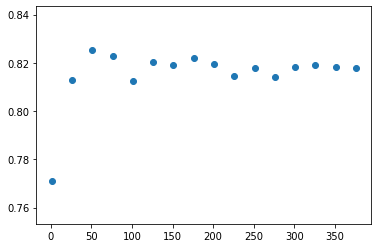

In [6]:
plt.scatter(n_trees, f1_test)

WeekofPurchase    0.108732
StoreID           0.072219
PriceCH           0.020514
PriceMM           0.018849
DiscCH            0.014665
DiscMM            0.020945
SpecialCH         0.014048
SpecialMM         0.014508
LoyalCH           0.518266
SalePriceMM       0.037082
SalePriceCH       0.024117
PriceDiff         0.054158
ListPriceDiff     0.037322
STORE             0.044574
dtype: float64


Text(0.5, 0, 'Average Feature Importance')

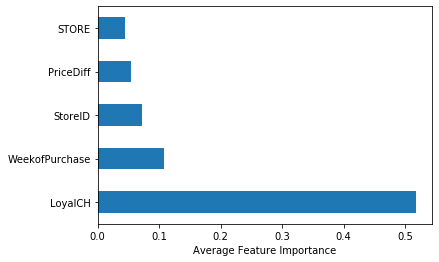

In [7]:
# Grafica los features mas importantes
avg_importance = np.average(feature_importance, axis=0)
a = pd.Series(avg_importance, index=predictors)
print(a)
a.nlargest().plot(kind='barh')
plt.xlabel('Average Feature Importance')